## EDA on geotagged tweets
#### Build basics of extracting key words, sentiments about crowdedness. Label the tweets. Look at frequency of tweets over time. Pay attention to the time the tweet was posted but also when it was referring to. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_pickle("../data/01_geotweets_raw_ee.pkl")

In [3]:
# df.head()

In [4]:
# df.info()

In [5]:
# Now set date to be our dataframe's index
df = df.set_index('date', drop = False)

In [6]:
daily_counts = df.text.resample('d').count()

In [7]:
# daily_counts.head()

In [8]:
import pytz
from pytz import timezone
est = pytz.timezone('US/Eastern')
today = dt.datetime.now(est)
startdate = min(df.date)
ticks = pd.date_range(start=startdate,end=today, freq = 'W')

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(30,5))
plt.plot(daily_counts)
plt.xticks(ticks=ticks,rotation=90)
plt.title("Number of Tweets by Day")
plt.xlabel("date")
plt.ylabel("number of tweets")
plt.savefig("../src/d06_visuals/geotweet_count.png", dpi=300, bbox_inches='tight')
# plt.show()

In [10]:
# Localize to US/Eastern time

import pytz
est = timezone('US/Eastern')
crisis_startdate = est.localize(pd.to_datetime("2020-03-23 00:00:00"))
# crisis_startdate

In [11]:
# len(df[df.date >= crisis_startdate])

In [12]:
df_corona = df[df.date >= crisis_startdate]

In [13]:
df_corona.to_pickle("../data/01_geotweets_raw_since_crisis_began_ee.pkl")

In [14]:
# # Check out the texts of the first 10 tweets
# for i in range(0,10):
#     print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text, ":", df_corona.iloc[i].username)

#### NOTES:
#### These are all garbage! I looked at everything from Danny Hellman and none of it was informative. Moreover, his materials are posted at weird times on Mondays, throwing off the daily and hourly tweet counts. So we will drop him before calculating these aggregates. 

In [15]:
# # Check out the texts of the last 10 tweets:
# for i in range(len(df_corona)-10,len(df_corona)):
#     print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text, ":", df_corona.iloc[i].username)

In [16]:
import re
distancing = []
for i in range(0,len(df_corona)):
    if re.match('.*(distancing)|(packed)|(crowd)|(busy)|(full)|(empty)|(quarantine).*',df_corona.iloc[i].text):
        distancing.append(1)

In [17]:
# print("So far, there have been",len(distancing),"tweets related to the crowding level in Prospect Park.")

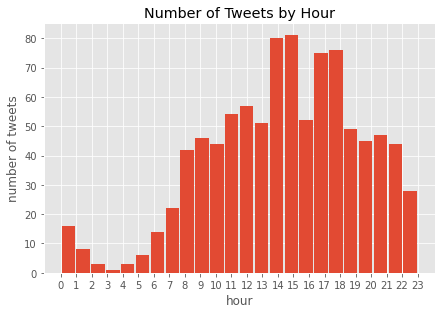

In [18]:
xticks=pd.Series(range(0,24))

df_nohellman = df[df.username != 'dannyhellman']

plt.hist(df_nohellman.hour, bins=24, rwidth=0.9)
plt.xticks(ticks=xticks)
plt.tight_layout()
plt.title("Number of Tweets by Hour")
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.savefig("../src/d06_visuals/geotweets_by_hr.png", dpi=300, bbox_inches='tight')
# plt.show()

In [19]:
# Graph tweet counts by hour, separating out the different days as different lines. 

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
counts = {}

for day in days:
    day_df = df_nohellman[df_nohellman.day_of_week == day]
    day_count = np.zeros(24).astype('int')
    
    for i in range(0,24):
        day_count[i] = len(day_df[day_df.hour == i])

    counts[day] = day_count

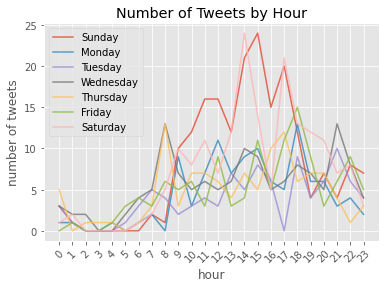

In [20]:
for day in days:
    plt.plot(counts[day],alpha=0.8)
    
plt.legend(days, loc='upper left')

# yticks=pd.Series(range(0,20))
xticks=pd.Series(range(0,24))
plt.xticks(ticks=xticks,rotation=45)
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.title("Number of Tweets by Hour")       
plt.savefig("../src/d06_visuals/geotweets_by_hr_day.png", dpi=300, bbox_inches='tight')
# plt.show()

In [21]:
## Double check that these hours are correct -- time zone
## make a plot with hr on the x and # tweets on y, w line for each day of week

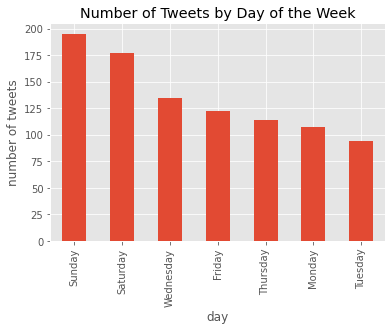

In [22]:
df_nohellman['day_of_week'].value_counts().plot(kind='bar')
plt.title("Number of Tweets by Day of the Week")
plt.xlabel("day")
plt.ylabel("number of tweets")
plt.savefig("../src/d06_visuals/geotweets_by_day.png", dpi=300, bbox_inches='tight')
# plt.show()